
Running U1 SU:
Hamiltonian parameters: t=1.0, U=8.0, mu=0.0
fPEPS parameters: Lx=4, Ly=4, D=4, N_f=14, seed=42
Chemical potential: 0.0

Generating random U1-fPEPS...


n=100, D=4, tau=0.1, max|dS|=0.00221, energy≈-0.539133: 100%|##########| 100/100 [00:16<00:00,  6.24it/s]
n=200, D=4, tau=0.03, max|dS|=0.000332, energy≈-0.54196: 100%|##########| 100/100 [00:15<00:00,  6.44it/s] 
n=300, D=4, tau=0.01, max|dS|=0.000103, energy≈-0.541292: 100%|##########| 100/100 [00:15<00:00,  6.55it/s]


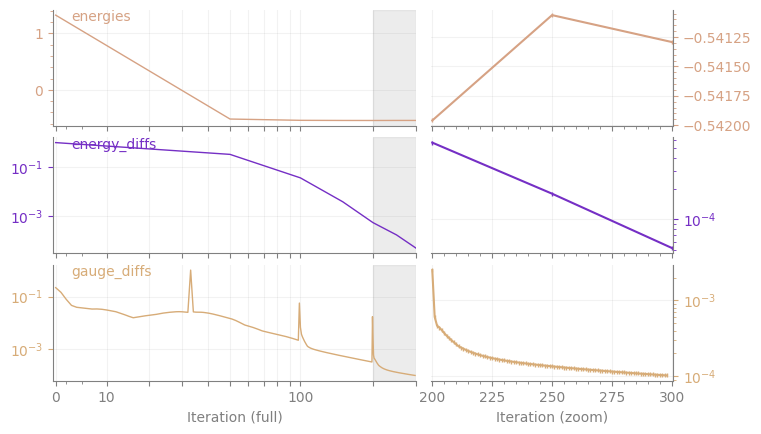


Running Z2 SU from U1-fPEPS:
Hamiltonian parameters: t=1.0, U=8.0, mu=0.0
fPEPS parameters: Lx=4, Ly=4, D=4, N_f=14
Chemical potential: 0.0



n=1, D=4, tau=0, energy≈-0.540206: 100%|##########| 1/1 [00:00<00:00,  2.39it/s]


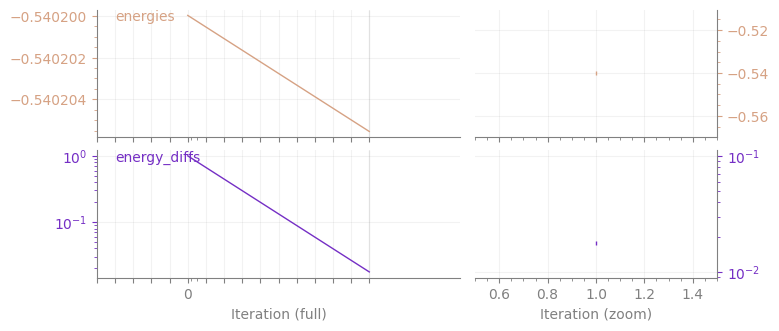

In [ ]:
import os
os.environ["NUMBA_NUM_THREADS"] = "20"
from SU_func import (
    run_u1SU,
    run_z2SU_from_u1SU,
)

Lx, Ly = 4, 4
N_f = Lx*Ly - 2
t = 1.0
U = 8.0
mu = 0.0
pwd = '/home/sijingdu/TNVMC/VMC_code/vmc_torch/vmc_torch/experiment/vmap/data'
seed = 42

D1 = 4
su_kwargs = {
    "compute_energy_per_site": True,
    'compute_energy_opts':{"max_distance":1}, 
    'compute_energy_every':50,
    'gate_opts':{'cutoff':1e-12},
    'ordering': 'smallest_last',
    'tol':1e-6,
}
su_evolve_schedule = [
    # (50, 0.05),
    (100, 0.1),
    (100, 0.03),
    (100, 0.01)
]
u1peps = run_u1SU(
    Lx=Lx,
    Ly=Ly,
    D=D1,
    N_f=N_f,
    t=t,U=U,mu=mu,
    pwd=pwd,
    seed=seed,
    # initial_peps=u1peps_w_pf,
    initial_peps=None,
    save_file=False,
    run_su=True,
    su_evolve_schedule=su_evolve_schedule,
    **su_kwargs,
)

su_evolve_schedule = [
    (1, 0.0),
    # (100, 0.001),
]
z2peps = run_z2SU_from_u1SU(
    Lx=Lx,
    Ly=Ly,
    D=D1,
    N_f=N_f,
    t=t,U=U,mu=mu,
    pwd=pwd,
    u1peps=u1peps,
    save_file=False,
    su_evolve_schedule=su_evolve_schedule,
    **su_kwargs,
)



In [5]:
for ts in u1peps.tensors:
    print(ts.data.indices)

(BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=False), BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=False), BlockIndex(chargemap={0: 1, 1: 2, 2: 1}, dual=False))
(BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=True), BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=False), BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=False), BlockIndex(chargemap={0: 1, 1: 2, 2: 1}, dual=False))
(BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=True), BlockIndex(chargemap={np.int64(0): 2, np.int64(1): 1, np.int64(2): 1}, dual=False), BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, dual=False), BlockIndex(chargemap={0: 1, 1: 2, 2: 1}, dual=False))
(BlockIndex(chargemap={np.int64(0): 2, np.int64(1): 1, np.int64(2): 1}, dual=True), BlockIndex(chargemap={np.int64(-1): 1, np.int64(0): 2, np.int64(1): 1}, du